In [1]:
#let us start by importing the relevant libraries

%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
##Read the data as a dataframe
df = pd.read_csv('vehicle.csv') 

In [3]:
#Perform basic EDA

In [4]:
df.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

In [5]:
##Data type of each attribute
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [6]:
## Shape of the data
df.shape

(846, 19)

In [7]:
##Checking the presence of missing values

In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_check(df)

Total   Percent
radius_ratio                     6  0.007092
skewness_about                   6  0.007092
circularity                      5  0.005910
scaled_radius_of_gyration.1      4  0.004728
distance_circularity             4  0.004728
scaled_variance                  3  0.003546
pr.axis_rectangularity           3  0.003546
scaled_radius_of_gyration        2  0.002364
scaled_variance.1                2  0.002364
pr.axis_aspect_ratio             2  0.002364
skewness_about.2                 1  0.001182
skewness_about.1                 1  0.001182
elongatedness                    1  0.001182
scatter_ratio                    1  0.001182
class                            0  0.000000
max.length_rectangularity        0  0.000000
max.length_aspect_ratio          0  0.000000
hollows_ratio                    0  0.000000
compactness                      0  0.000000

In [9]:
##5 Point summary of numerical attributes
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [10]:
df.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

In [11]:
##Let's treat data for missing values first and then we can see the outliers

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
columns = df.columns
#Let's Label Encode our class variable: 
print(columns)
df['class'] = le.fit_transform(df['class'])
df.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

In [13]:
from sklearn.impute import SimpleImputer
newdf = df.copy()
X = newdf.iloc[:,0:19] #separting all numercial independent attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column)
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [14]:
missing_check(newdf)

Total  Percent
class                            0      0.0
pr.axis_rectangularity           0      0.0
circularity                      0      0.0
distance_circularity             0      0.0
radius_ratio                     0      0.0
pr.axis_aspect_ratio             0      0.0
max.length_aspect_ratio          0      0.0
scatter_ratio                    0      0.0
elongatedness                    0      0.0
max.length_rectangularity        0      0.0
hollows_ratio                    0      0.0
scaled_variance                  0      0.0
scaled_variance.1                0      0.0
scaled_radius_of_gyration        0      0.0
scaled_radius_of_gyration.1      0      0.0
skewness_about                   0      0.0
skewness_about.1                 0      0.0
skewness_about.2                 0      0.0
compactness                      0      0.0

In [15]:
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [16]:
##we got rid of all missing values let's see outliers 
##Checking the presence of outliers and distribution

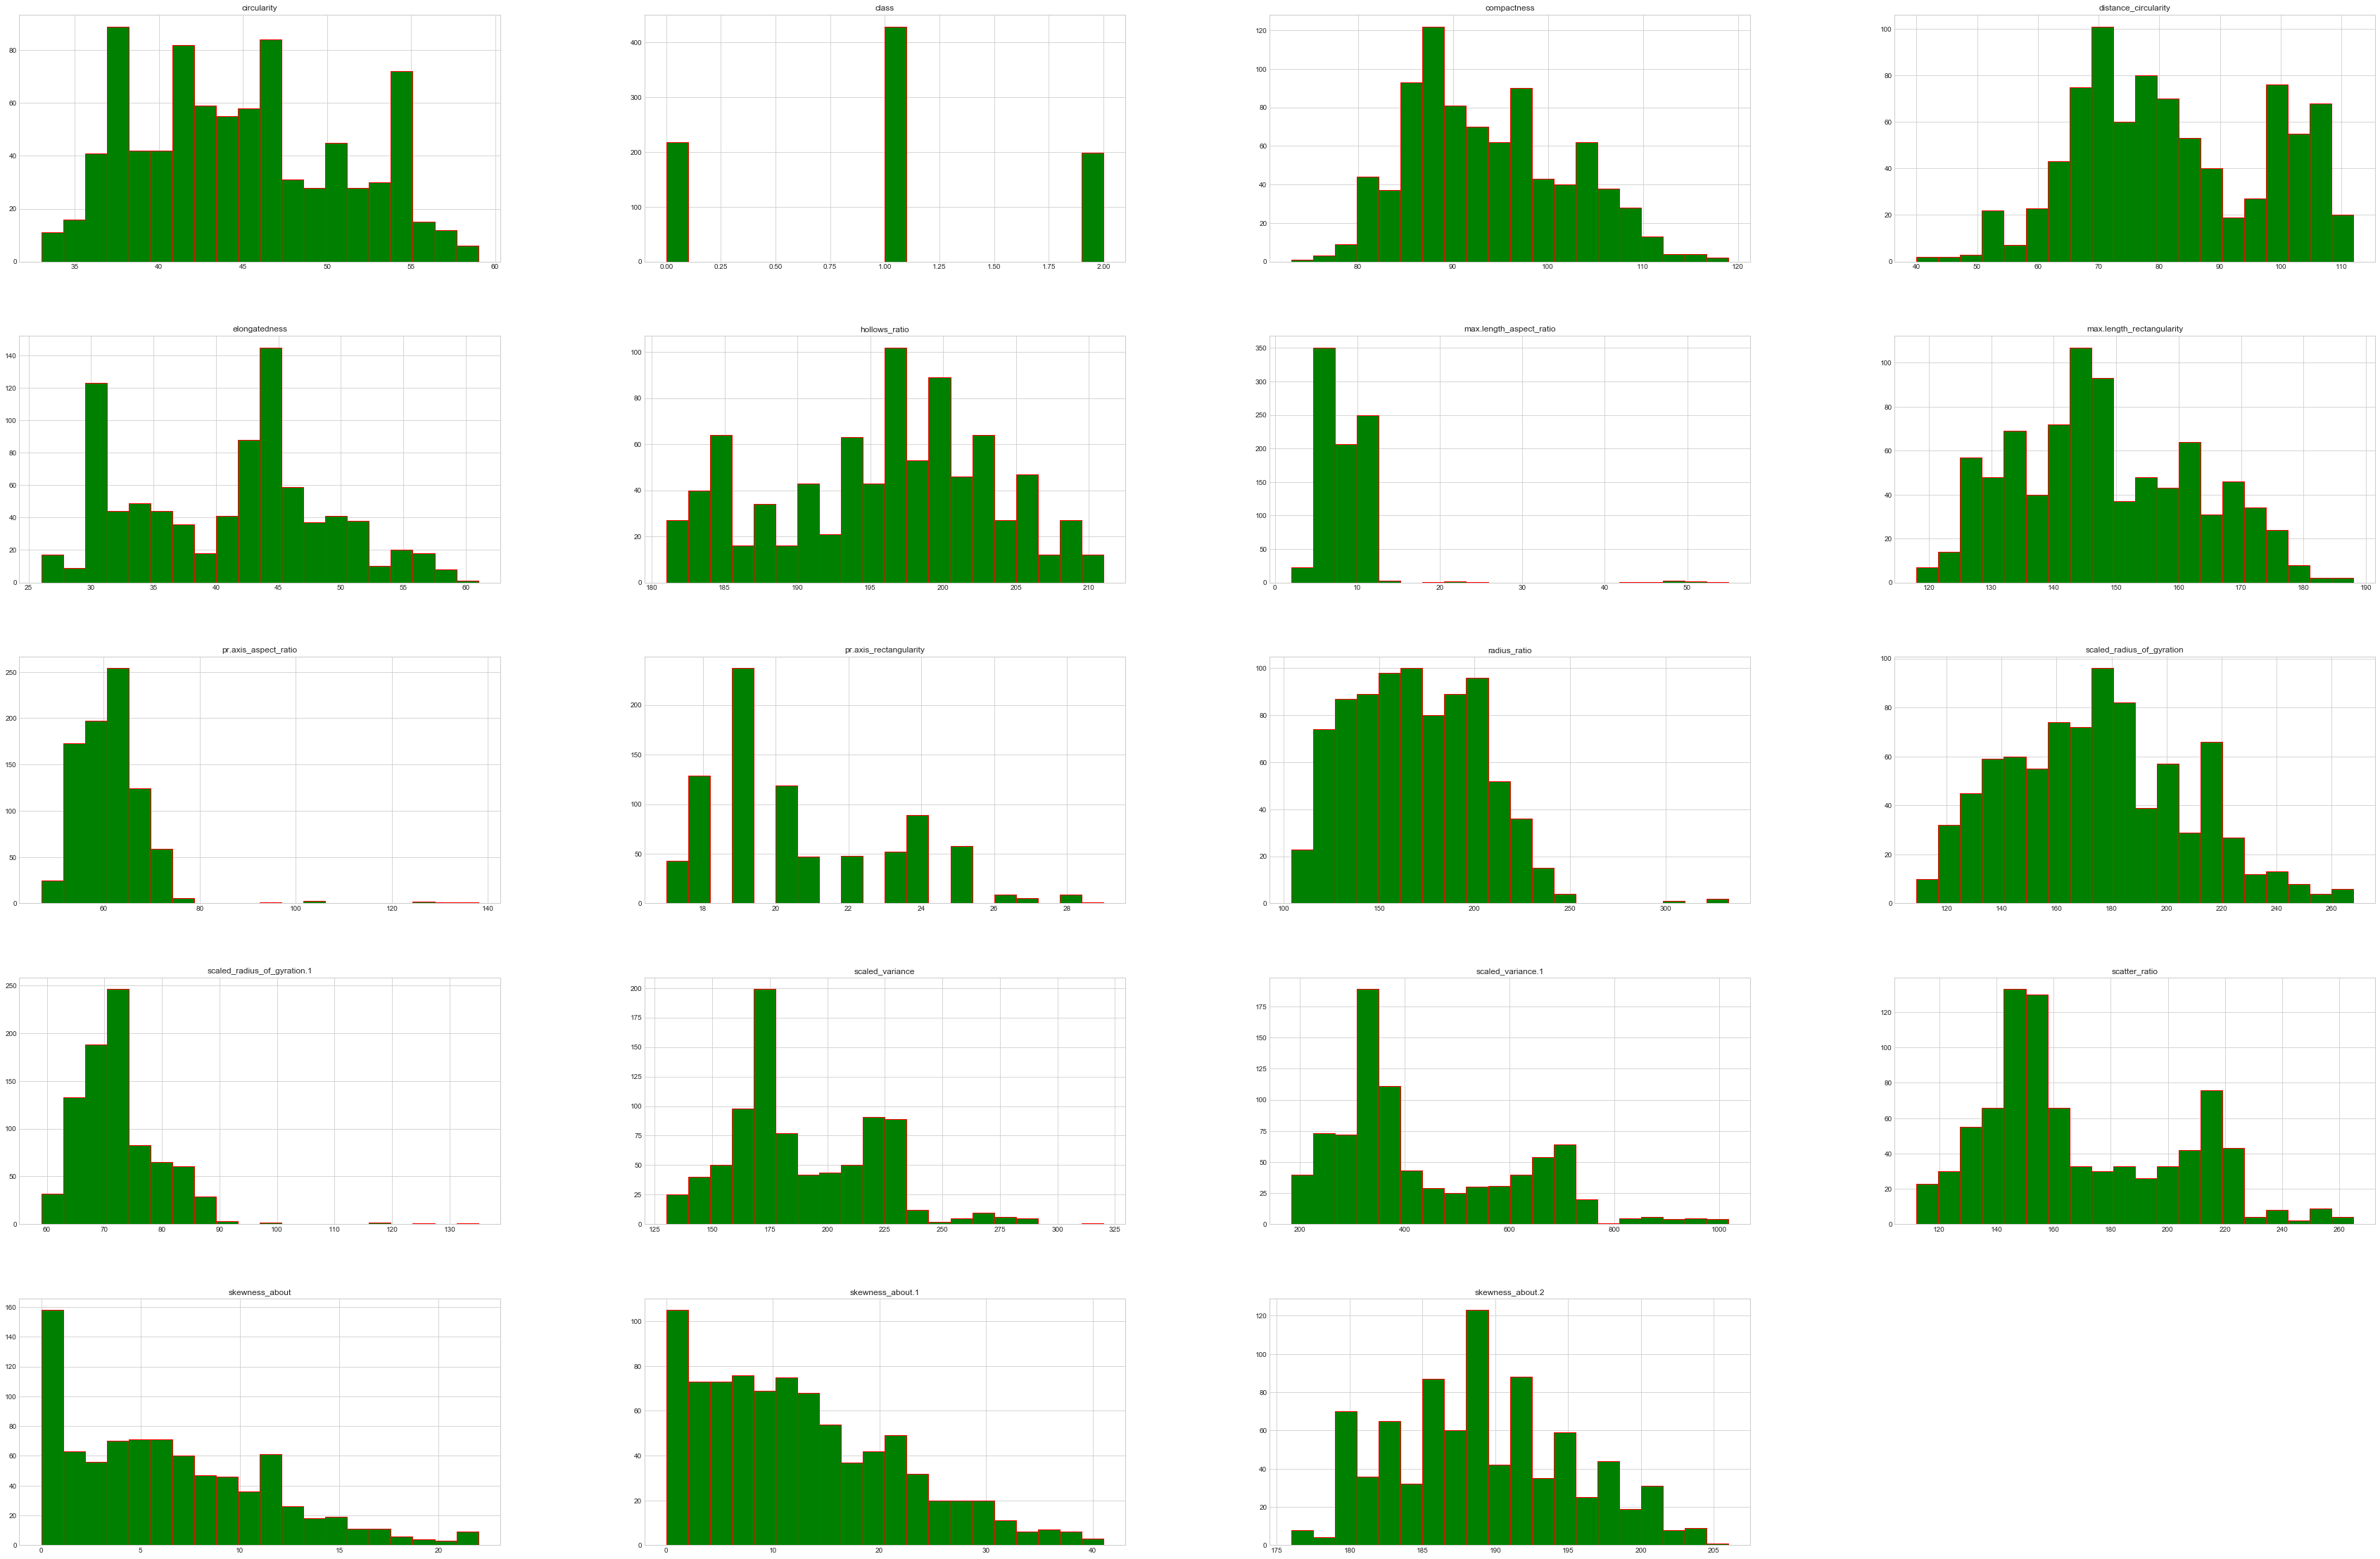

In [17]:
plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(60,40), color='green', edgecolor = 'red')
plt.show()

In [18]:
## Observation
# Most of the data attributes seems to be normally distributed
# scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skewed.
# pr.axis_rectangularity seems to be haing outliers as there are some gaps found in the bar plot.

In [19]:
skewValue = newdf.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


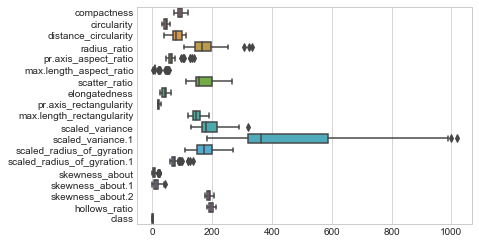

In [20]:
#univariant analysis using boxplot 
sns.boxplot(data=newdf, orient="h")

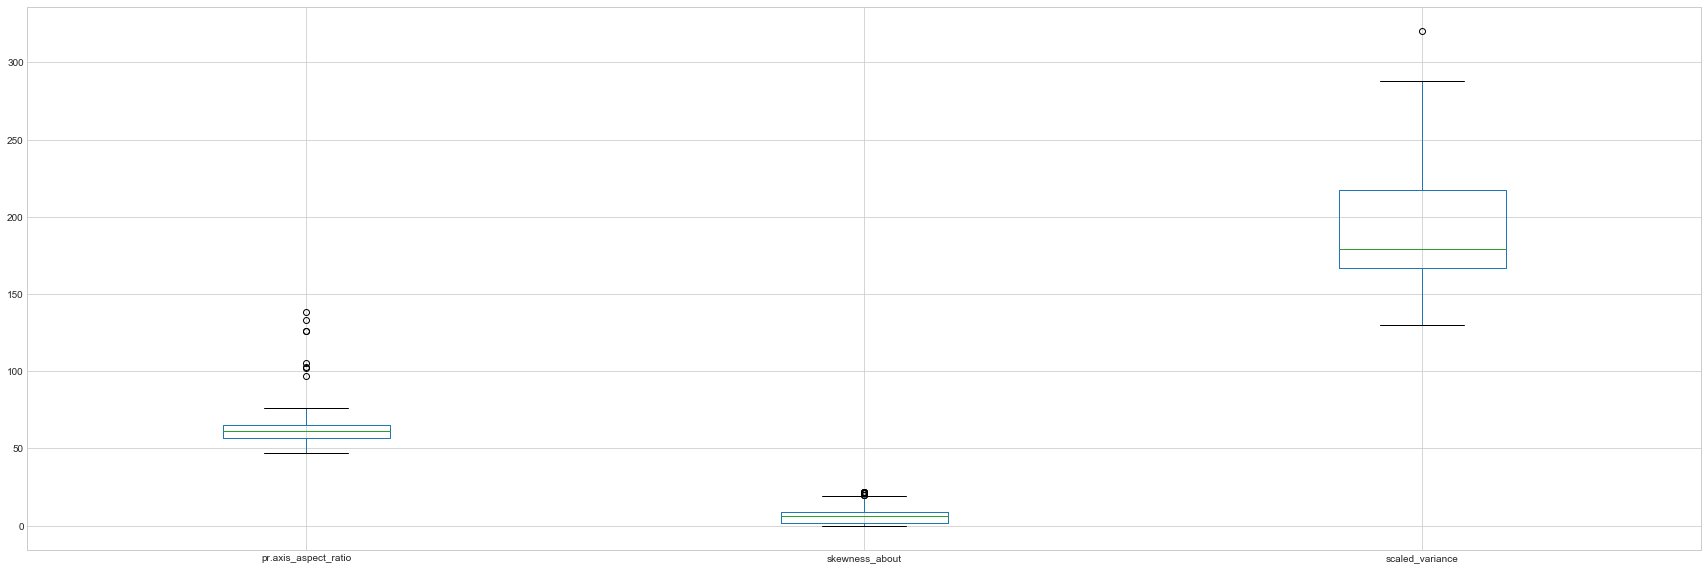

In [21]:
newdf.boxplot(column=['pr.axis_aspect_ratio','skewness_about','scaled_variance'], figsize=(30,10))

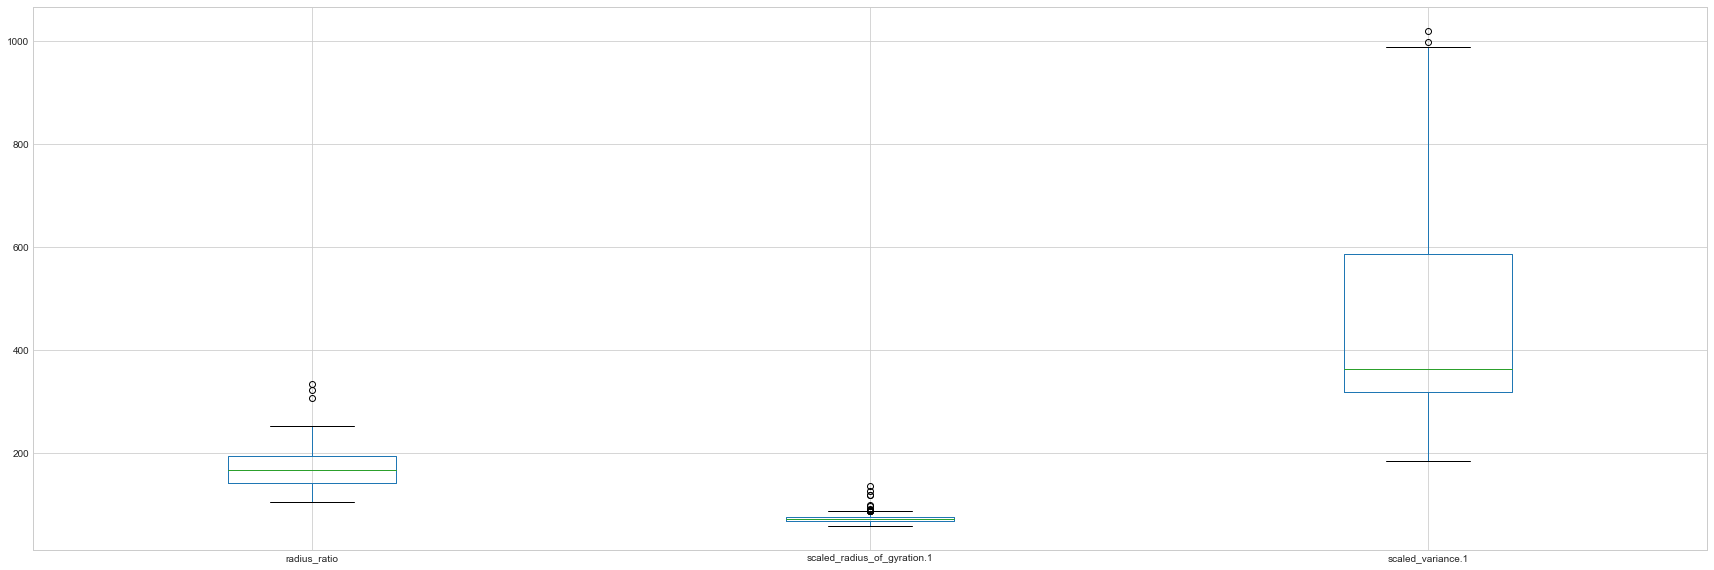

In [22]:
newdf.boxplot(column=['radius_ratio','scaled_radius_of_gyration.1','scaled_variance.1'], figsize=(30,10))

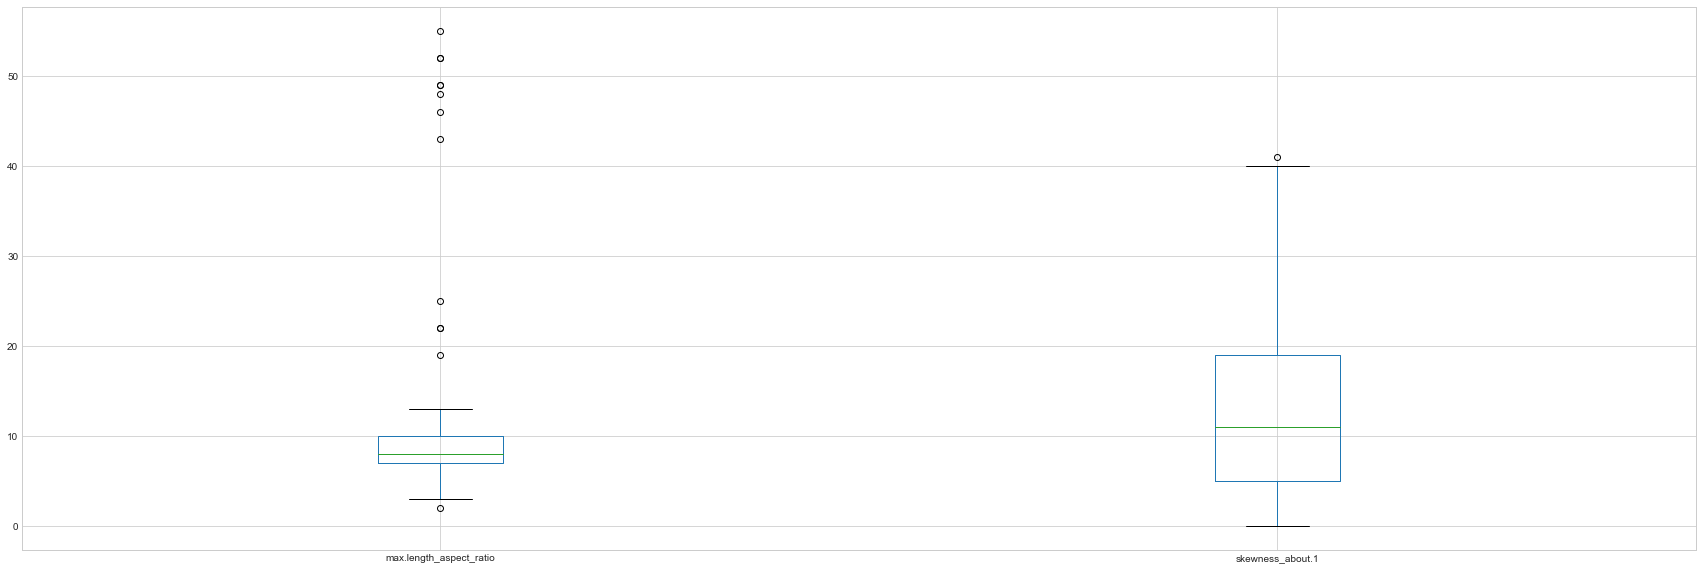

In [23]:
newdf.boxplot(column=['max.length_aspect_ratio','skewness_about.1'], figsize=(30,10))

In [24]:
## Observation
# pr.axis_aspect_ratio, skewness_about, max_length_aspect_ratio, skewness_about_1,
# scaled_radius_of_gyration.1, scaled_variance.1, radius_ratio, skewness_about, scaled_variance.1 
# are some of the attributes with outliers.

In [25]:
# Let's start Treating Outliers Using IQR: Upper whisker

In [26]:
newdf.shape

(846, 19)

In [27]:
from scipy.stats import iqr
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [28]:
np.where((newdf < (Q1 - 1.5 * IQR)) | (newdf > (Q3 + 1.5 * IQR)))

(array([  4,   4,   4,  37,  37,  37,  37,  44,  47,  79,  85, 100, 100,
        100, 113, 123, 127, 132, 135, 135, 135, 135, 190, 230, 291, 291,
        291, 346, 381, 388, 388, 388, 388, 388, 391, 400, 498, 505, 516,
        523, 523, 523, 544, 623, 655, 655, 706, 706, 706, 761, 796, 797,
        815, 815, 835]),
 array([ 4,  5, 13,  3,  4,  5, 13, 14, 13, 13, 11,  4,  5, 13, 14, 14,  5,
        15,  3,  4,  5, 13, 14, 13,  4,  5, 13, 14, 13,  3,  4,  5, 10, 13,
         5, 14, 13, 14, 14,  4,  5, 13,  5, 14,  5, 13,  4,  5, 13, 14, 14,
        14,  5, 13, 11]))

In [29]:
# we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [30]:
newdf2 = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
newdf2.shape

(813, 19)

In [31]:
# let's check outliers are removed by boxplot

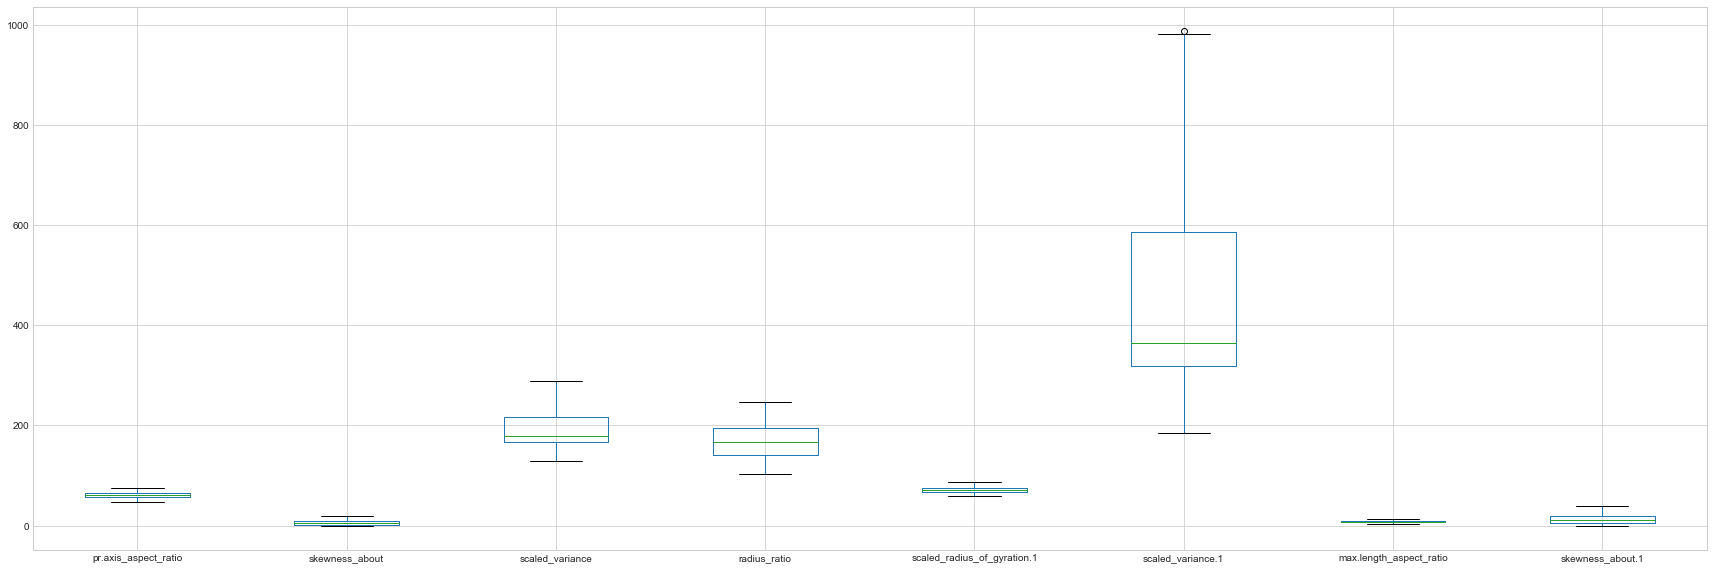

In [32]:
newdf2.boxplot(column=['pr.axis_aspect_ratio','skewness_about', 'scaled_variance','radius_ratio', 'scaled_radius_of_gyration.1',
                     'scaled_variance.1', 'max.length_aspect_ratio', 'skewness_about.1'], figsize=(30,10))

In [33]:
#from above I can see only one outlier in scaled_variance.1 
#that I can be considered because it's almost on the tip of the boxplot

In [34]:
## Let's undertsatnd the relationship between independent variables

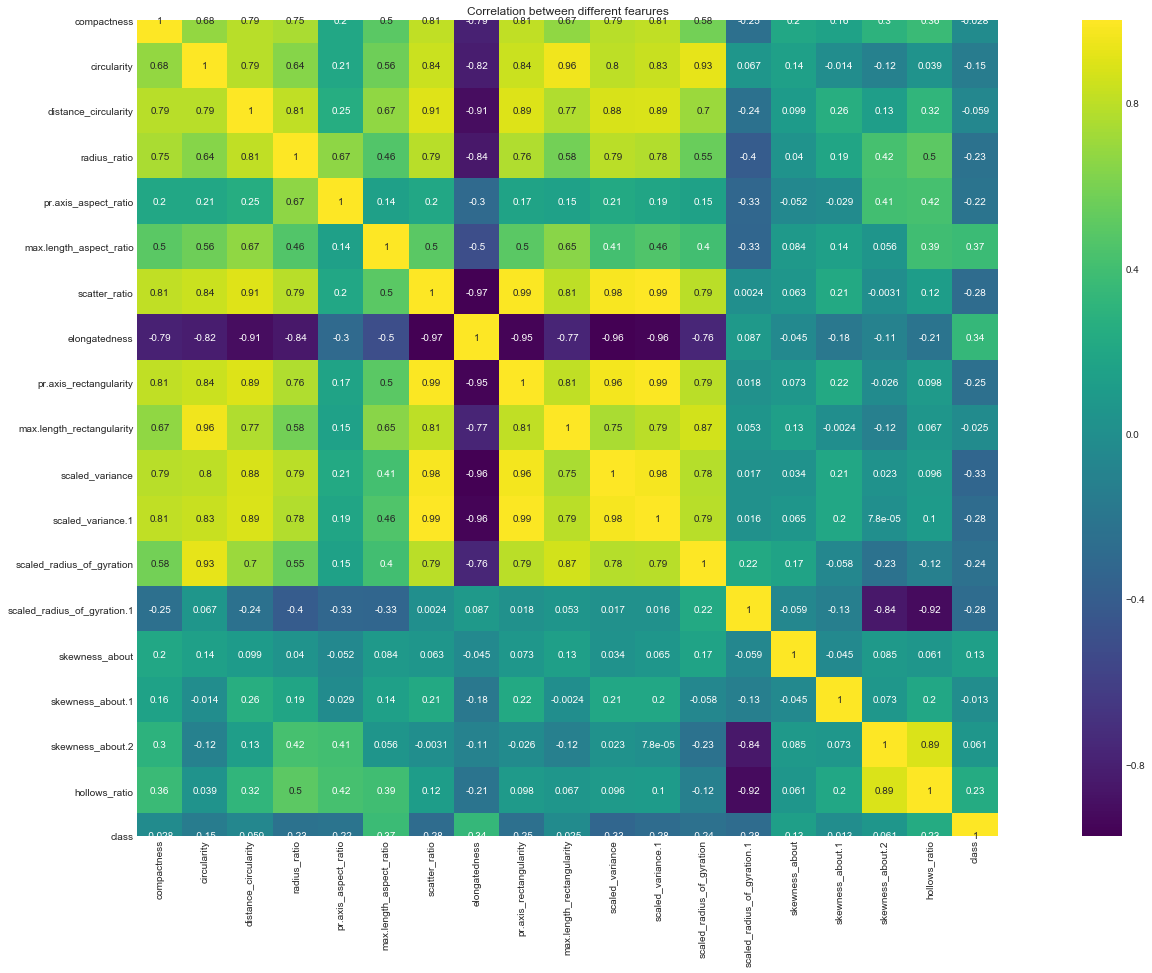

In [35]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
cleandf= newdf2.drop('class', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(newdf2, 30,15)


In [36]:
# Strong relation
#       - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
#       - skewness_about_2 and hollow_ratio seems to be strongly correlated, coeff: 0.89
#       - ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
#       - compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
#       - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
#       - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
#       - scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
#       - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95

In [37]:
#No/little relation
#       -max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.46
#       - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
#       - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
#       - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
#       - skewness_about & skewness_about.1 not be correlated
#       - skewness_about.1 and skewness_about.2 are not correlated

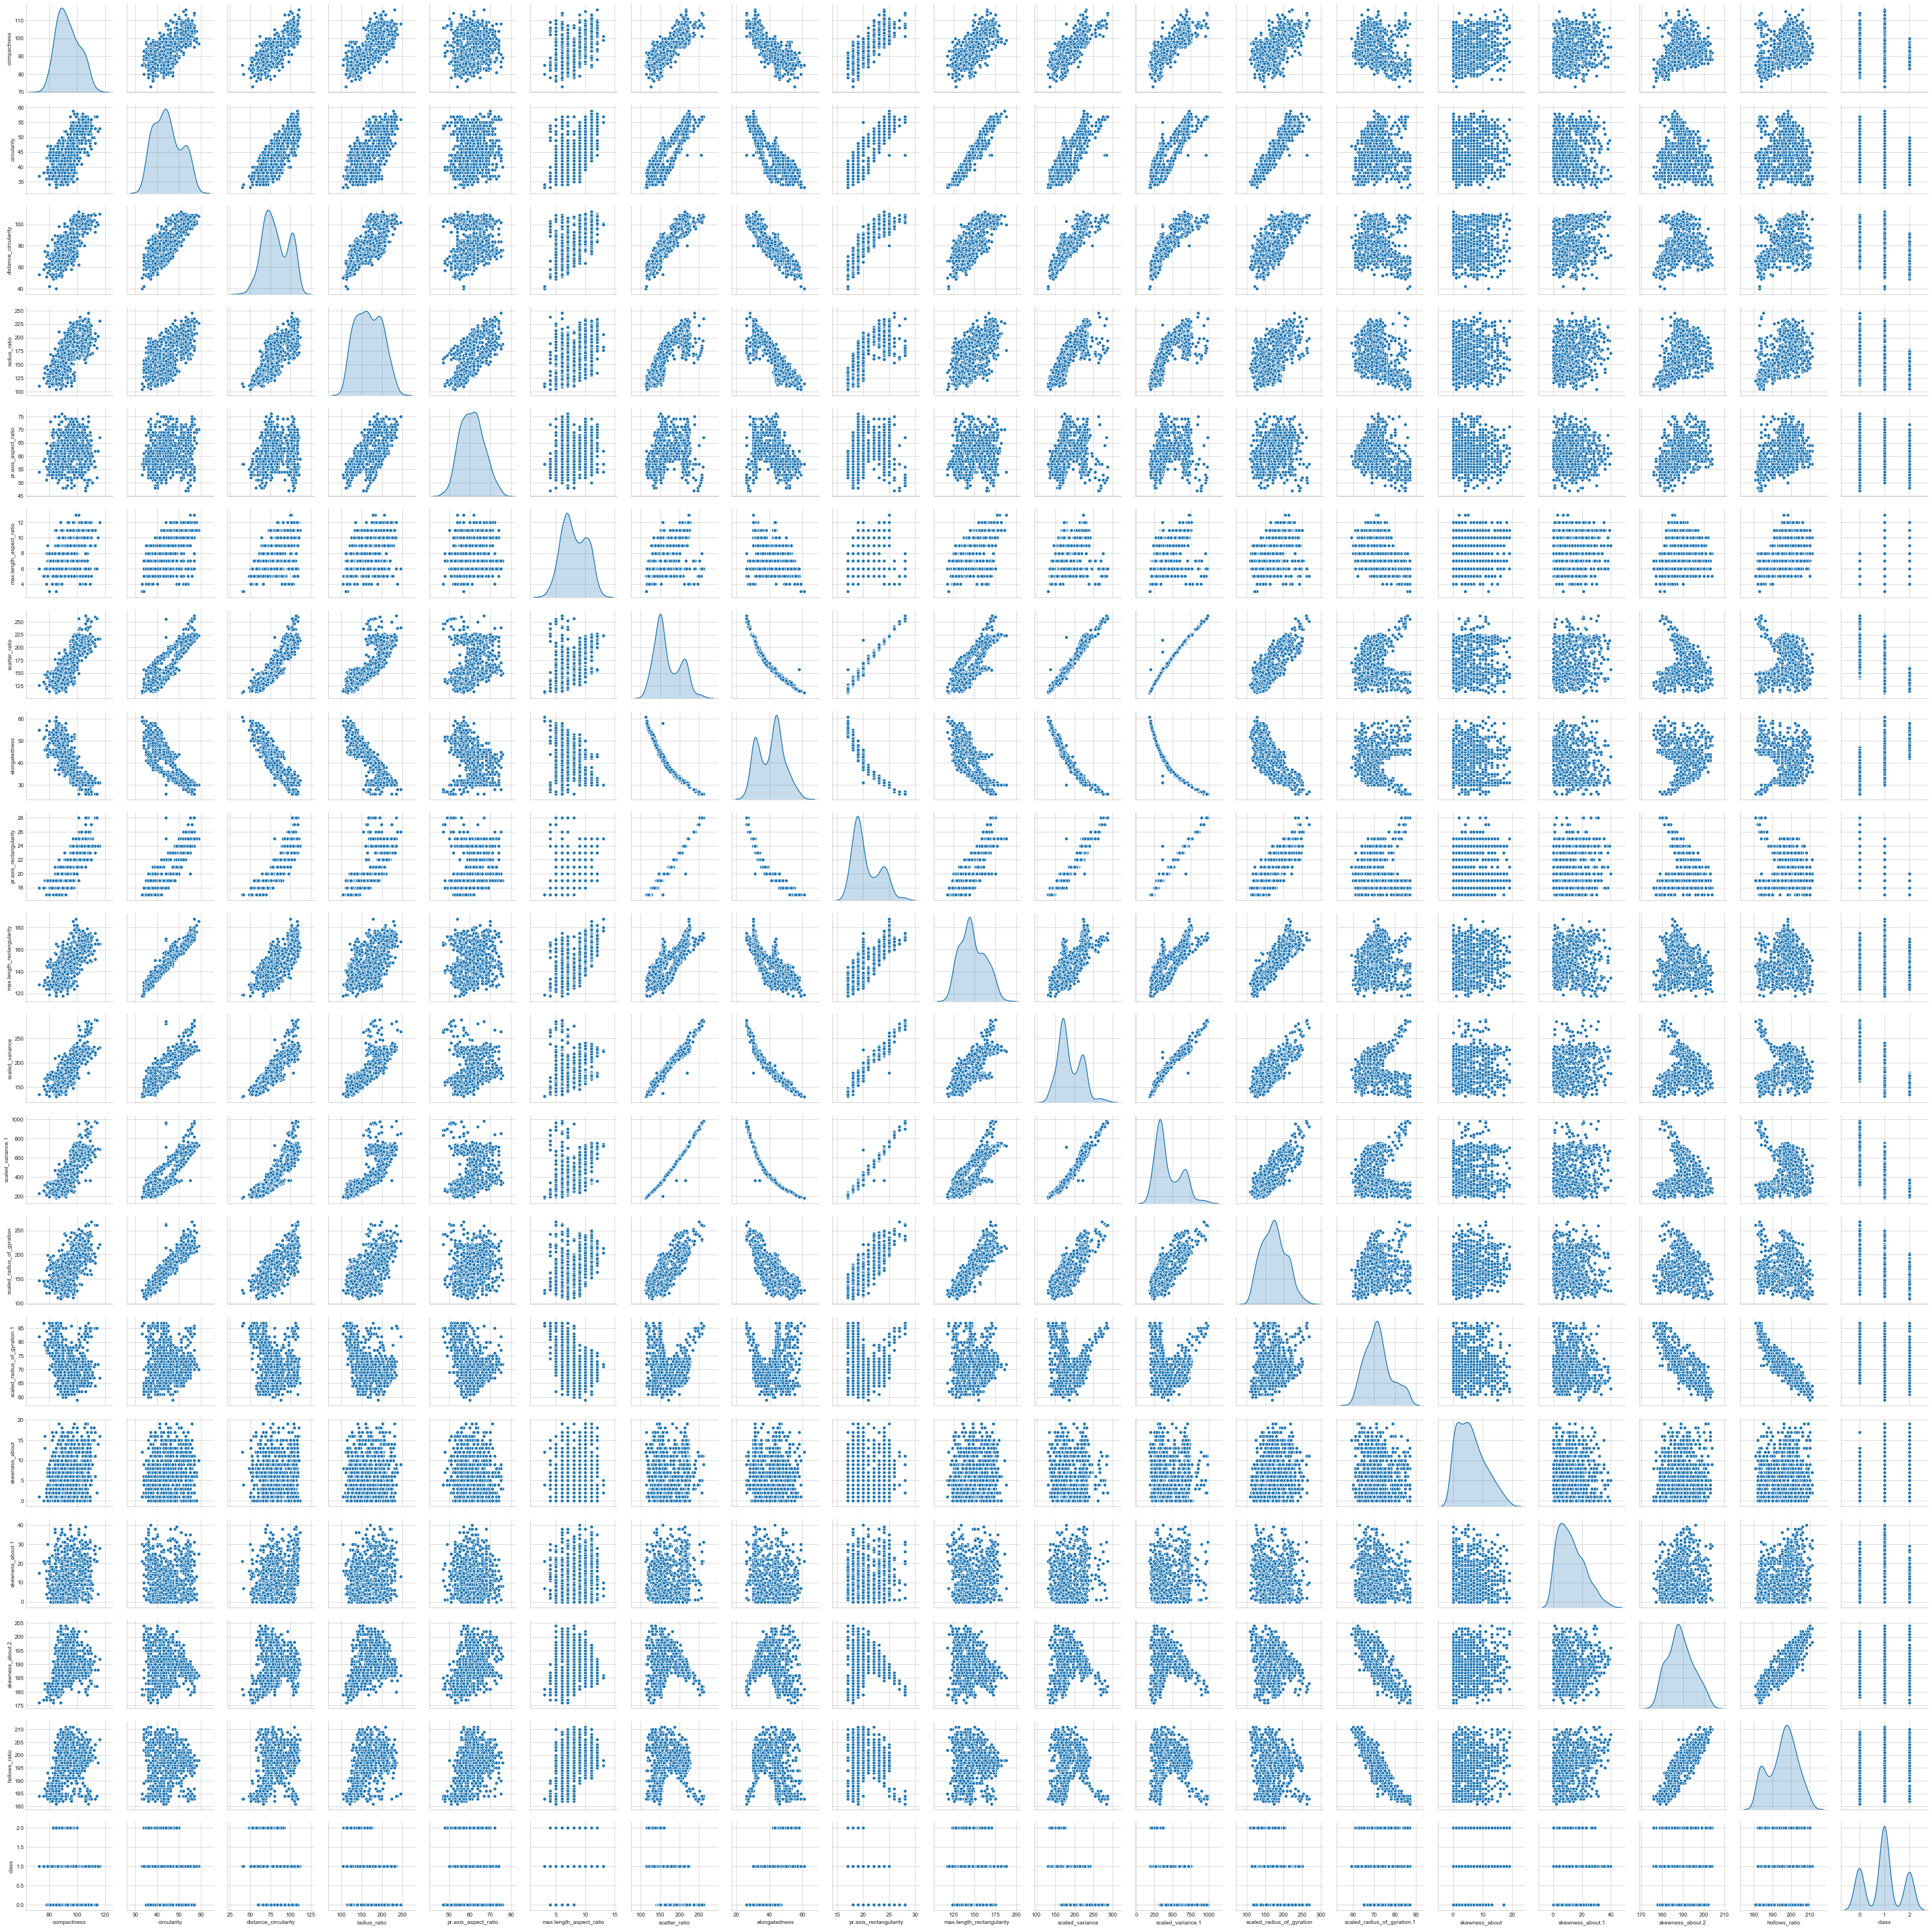

In [38]:
sns.pairplot(newdf2, diag_kind="kde")

In [39]:
# From above correlation matrix we can see that there are many features which are highly correlated. 
#we will find that many features are there which having more than 0.9 correlation. 
#so we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:

# max.length_rectangularity
# scaled_radius_of_gyration
# skewness_about.2
# scatter_ratio
# elongatedness
# pr.axis_rectangularity
# scaled_variance
# scaled_variance.1

In [40]:
## use a dimension reduction algorithm such as Principle Component Analysis (PCA). 
# We will go for PCA and analyse the same going forward

In [41]:
#Let's choose the right variable

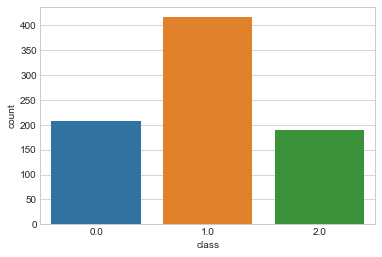

In [42]:
#display how many are car,bus,van. 
newdf2['class'].value_counts()
sns.countplot(newdf2['class'])
plt.show()

In [43]:
#. Split the data into train and test 

In [44]:
X = newdf2.iloc[:,0:18].values
y = newdf2.iloc[:,18].values
X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [45]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.09326627e-01  1.00123153e+00
   6.67029240e-

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72251046e-01 -8.97284818e-02  2.26045073e-02  1.30419032e-01
  -1.52324139e-01  2.58374578e-01 -1.88794221e-01 -7.71578238e-01
  -3.61784776e-01 -1.25233628e-01  2.92009470e-02  7.62442008e-04
  -1.06680587e-02  1.05983722e-02 -1.01407495e-01 -1.46326861e-01
  -3.81638532e-03  3.32992130e-03]
 [-2.85370045e-01  1.33173937e-01  2.10809943e-01 -2.06785531e-02
   1.39022591e-01 -6.88979940e-02  3.90871235e-01 -6.60528436e-02
  -4.62957583e-02  2.40262612e-01  7.29503235e-02  1.93799916e-01
  -7.74670931e-03 -8.71766559e-02 -3.11337823e-01  1.96463651e-01
  -2.96230720e-01  5.83996136e-01]
 [-3.01486231e-01 -4.40259591e-02 -7.08780817e-02  1.07425217e-01
   8.07335409e-02 -2.04800896e-02 -1.76384547e-01  2.98693883e-01
  -2.64499195e-01 -9.42971834e-02  7.78755026e-01 -2.32649049e-01
   1.11905744e-02  2.28724292e-02  5.89166755e-02  5.33931974e-02
   9.72735293e-02  8.64160083e-02]
 [-2.72594510e-01 -2.04232234e-01 -4.02139629e-02 -2.52957341e-01
  -1.19012554e-01 -

In [48]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.792975698382946, array([-0.27225105, -0.28537005, -0.30148623, -0.27259451, -0.09857976,
       -0.19475579, -0.31051844,  0.30843834, -0.30754849, -0.27630107,
       -0.30274811, -0.30704063, -0.26152049,  0.04363236, -0.0367057 ,
       -0.05885041, -0.03483739, -0.08281362])), (3.377106439893973, array([-0.08972848,  0.13317394, -0.04402596, -0.20423223, -0.25913686,
       -0.09457563,  0.07233508, -0.01168768,  0.08409153,  0.12583663,
        0.07019986,  0.07793366,  0.20992728,  0.50391445, -0.01456825,
       -0.09339805, -0.50166421, -0.50654656])), (1.2087305396350991, array([ 0.02260451,  0.21080994, -0.07087808, -0.04021396,  0.11480523,
        0.13931348, -0.1129247 ,  0.09003305, -0.11106355,  0.21987769,
       -0.14481876, -0.11532395,  0.21362744, -0.06739209,  0.52162344,
       -0.68717064,  0.06220695,  0.04080354])), (1.1365956021766952, array([ 0.13041903, -0.02067855,  0.10742522, -0.25295734, -0.605228  ,
        0.32253141, -0.01005404,  0.07991176,  0.0

In [49]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

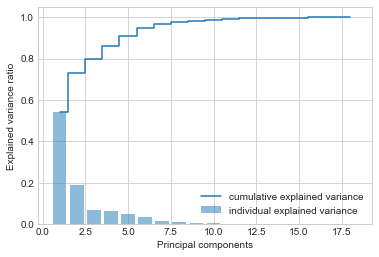

In [50]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [51]:
# Observation:
# - From above plot we can clealry observer that 8 dimensions are able to explain 95 %variance of data. 
# - we will use 8 principal components going forward and calulate the reduced dimensions. 

In [52]:
# Dimensionality Reduction
# Now 8 dimensions seems very reasonable. 
#With 8 variables we can explain over 95% of the variation in the original data!

In [53]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 18 to 8 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot
Proj_data_df

0         1         2         3         4         5         6  \
0   -0.591125 -0.655523  0.564477 -0.659870  0.855251 -1.835814  0.155983   
1    1.524878 -0.327117  0.251528  1.296236  0.282463 -0.091649 -0.209862   
2   -3.969982  0.239514  1.229875  0.180391 -0.919360 -0.650638 -0.826445   
3    1.549729 -3.037566  0.466449  0.394413  0.623392  0.383794 -0.131539   
4   -5.468963  4.651385 -1.290061  0.023804 -1.692033  2.510965 -0.315330   
..        ...       ...       ...       ...       ...       ...       ...   
808  0.368201 -0.641878 -1.481101  0.164090 -0.777381 -0.934650 -0.874360   
809  0.040917 -0.160848 -0.473839 -0.179208  1.978454 -1.431609  0.279248   
810 -5.188919 -0.171319  0.585738 -0.886837  1.348744  0.225891 -0.888525   
811  3.321748 -1.094132 -1.930953  0.339361  0.527587 -0.030116  0.265542   
812  5.012853  0.432697 -1.315713  0.196398  0.167606  0.345863  0.409124   

            7  
0   -0.683144  
1    0.127745  
2    0.163185  
3   -0.176248  
4    0.475009  
..        ...  
808  0.193428  
809 -0.302916  
810 -0.429704  
811  0.451123  
812 -0.221262  

[813 rows x 8 columns]

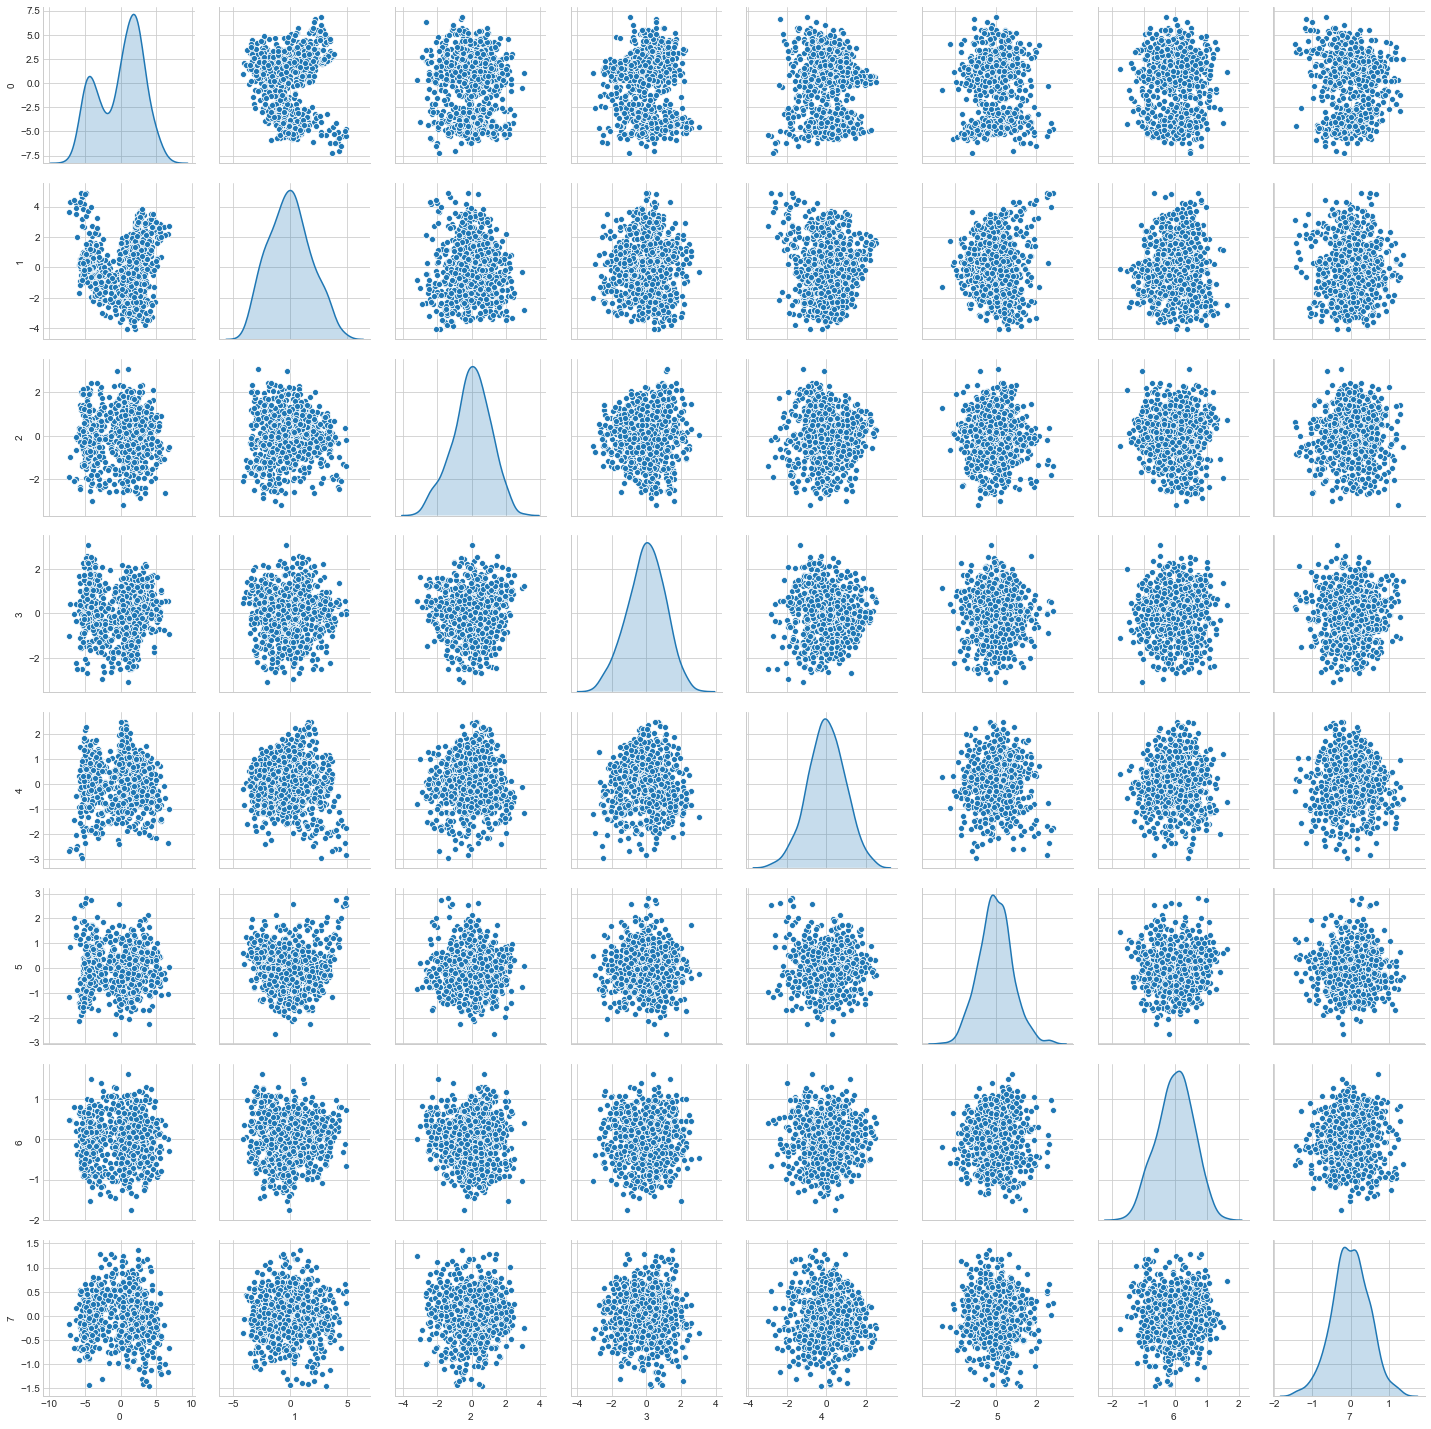

In [54]:
#Let us check it visually


sns.pairplot(Proj_data_df, diag_kind='kde') 

In [55]:
# After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. 
# As most of them have cloud of data points with no lienaer kind of relationship.

In [56]:
# Let's Fit SVC Model ON Train-test Data:

In [57]:
# split the data

In [58]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
#PCA Data
pca_X_train, pca_X_test, pca_y_train, pca_y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=seed)

In [59]:
#let's check the split of data
print("{0:0.2f}% data is in training set".format((len(Orig_X_train)/len(Proj_data_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(Orig_X_test)/len(Proj_data_df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [60]:
print(pca_X_test)
print(Orig_X_test)

            0         1         2         3         4         5         6  \
558 -4.481191  0.866539  1.948918  0.434209 -0.211405 -0.352762 -0.542643   
396  1.964272 -1.263445  0.910392 -0.224778 -0.579020 -0.279106  1.026415   
327  4.660313  2.486299 -0.479277 -1.537521 -0.778268 -0.102202 -0.444303   
278  3.249787 -1.768684 -1.542845  1.228381  0.427296  0.078997  0.288564   
264 -5.362055 -0.995548 -0.561607  0.985304 -0.380091 -1.711219  0.164456   
..        ...       ...       ...       ...       ...       ...       ...   
806  1.840122 -1.930005  1.706548 -0.075728  0.189226  0.009464  0.627631   
177  1.601219 -1.818944 -1.651601 -0.558317  0.145109 -0.117596 -0.689553   
640 -4.737213 -0.987764 -0.135143 -0.241860  0.244474  0.015232 -0.047512   
37   1.642834  0.939965  1.419198 -2.456310 -0.335444 -1.409952  0.089128   
97  -1.546332  0.311510 -2.598904 -1.458681 -1.526858  0.256477  0.312678   

            7  
558 -0.103803  
396  0.158257  
327 -0.361004  
278 -0.8572

In [61]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [62]:
from sklearn import svm
svc = SVC() #instantiate the object
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

In [63]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [64]:


print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))


Model Score On Original Data  0.9631147540983607
Model Score On Reduced PCA Dimension  0.9508196721311475
Before PCA On Original 18 Dimension 0.9631147540983607
After PCA(On 8 dimension) 0.9508196721311475


In [65]:
pca_y_grid = (np.column_stack([pca_y_test, pca_y_predict]))

In [66]:
print(pca_y_grid)

[[1. 1.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [2. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [2. 1.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [0. 0.]
 [2. 2.]
 

In [67]:
np.savetxt("ocr.csv", pca_y_grid , fmt='%s')

In [68]:
import string
lab= list(string.ascii_uppercase[0:26])
plab=["Pr "+s for s in lab]

In [69]:
# Filter those cases where the model committed mistake and analyze the mistake,
# which characters most mistakes occured on?

Confusion Matrix For : 
 Original Data Set [[ 62   0   1]
 [  0 119   3]
 [  0   5  54]]


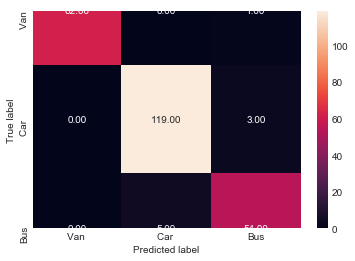

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 62   1   0]
 [  1 117   4]
 [  0   6  53]]


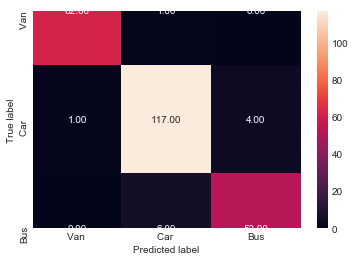

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        63
         1.0       0.96      0.98      0.97       122
         2.0       0.93      0.92      0.92        59

    accuracy                           0.96       244
   macro avg       0.96      0.96      0.96       244
weighted avg       0.96      0.96      0.96       244

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        63
         1.0       0.94      0.96      0.95       122
         2.0       0.93      0.90      0.91        59

    accuracy                           0.95       244
   macro avg       0.95      0.95      0.95       244
weighted avg       0.95      0.95      0.95       244



In [70]:
# from sklearn import metrics
# print(metrics.confusion_matrix(pca_y_test, pca_y_predict,labels=[0, 1]))
# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(Orig_y_test, Orig_y_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

In [71]:
##### confusion matrix On original observation
#    - Our model on original data set has correctly classified 63 van out of 63 actuals vans and has errored only in one case where it has wrongly predicted van to be a bus.  
#    - IN case of 127 actual cars our svm model has correcly classified 122 cars. it has wrongly classified 3 cars to be a bus and also 1 car to be a van
#    - In case of 61 instances of actual bus , our model has correctly classified 53 buses , It has faltered in classifying wrongly 0 buses to be a van and one bus to be a car. 


# on PCA
# - Out of 66 actual instances of vans our model has correctly predicted 62 vans and errored in 1 instances where it wrongly classified vans to be a car. 
# - Out of 127 actuals cars , our mdoel has correclty classified 117 of them to be a  car and faltered in 4 cases where it wrongly classified.

# - Out of 61 actual bus , our model has correclty classified 53 of them to be a bus. It has faltered in 6 cases where it wrongly classified.

In [72]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
# on pca
regression_model.fit(pca_X_train, pca_y_train)
regression_model.coef_

array([ 0.04090819, -0.07605928,  0.12626454,  0.30841616,  0.29301096,
       -0.0495768 , -0.14523604, -0.23055271])

In [73]:
print("with pca data: intercept", regression_model.intercept_)

with pca data: intercept 0.9715417749414592


In [74]:
print("PCA score: ", regression_model.score(pca_X_test, pca_y_test))

PCA score:  0.5417950979991832


In [75]:
# #on original
regression_model.fit(Orig_X_train, Orig_y_train)
print("with original data coef: ", regression_model.coef_)
print("with original data: intercept", regression_model.intercept_)
print("Original score: ", regression_model.score(Orig_X_test, Orig_y_test))

with original data coef:  [ 0.12256079 -0.34374244  0.36722453  0.43057055 -0.2396492   0.2575449
 -0.44130646  1.13029559  0.09675039  0.44023939  0.27912788  0.09260166
 -0.05533061  0.04077368  0.04506528 -0.05961154 -0.16458783  0.18412199]
with original data: intercept 0.9783123113728347
Original score:  0.6786314628377199


In [76]:
# Lessons -

# 1. Uses PCA only when the original dimensions have linear relations. The original dimensions had negative curvilinear relations
# 2. Remove outliers before doing PCA. We have significant outliers which are due to mix up of the gaussians in original dimension

# Suggestion -

# 1. Segment the original data based on observations using K Means clustering
# 2. Remove the outliers from the segments
# 2. If the original dimensions show strong linear relations in the segments, then apply PCA

In [77]:

#Observation:

# Model Score On Original Data  0.9631147540983607
# Model Score On Reduced PCA Dimension  0.9508196721311475
# Before PCA On Original 18 Dimension 0.9631147540983607
# After PCA(On 8 dimension) 0.9508196721311475
# On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 95 %
# But when we applied the SVC model on PCA(reduced dimensions) our model scored 96 %.
# Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8,
#our model has fared well in terms of accuracy score. But it's in lesser dimension hence we can consider PCA here it really
#can afford the loss of data from those other dimensions.


# I tried the both PCA and original data on logistic regression as well. Hence observation there:
#     PCA score:  0.5417950979991832
#     Original score:  0.6786314628377199
#         so model is performing very poor with both orioginal and pca hence we will not suggest to use logistic regression.
#         I think SVM (SVC) is good way.